# Compressible Flow. An introduction

An excellent review of this subject can be read in the [book by White](https://www.mheducation.com/highered/product/fluid-mechanics-white/M9781260258318.html) ([UPC library link](https://discovery.upc.edu/permalink/34CSUC_UPC/11q3oqt/alma991004874831006711) ), or [by Kundu et al](https://www.elsevier.com/books/fluid-mechanics/kundu/978-0-12-405935-1) ([UPC library link](https://discovery.upc.edu/permalink/34CSUC_UPC/11q3oqt/alma991004876305406711) )

## 1. Acoustics and velocity of sound

We are going, for the moment, that our flow is 1-D and inviscid. Also gravity or other body forces are ignored. In this case, continuity and Euler equations are written as

$$
\frac{\partial \rho}{\partial t} + \frac{\partial }{\partial x}\left(\rho u\right) =  0 \tag{1}
$$

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = -\frac{1}{\rho}\frac{\partial p}{\partial x} \tag{2}
$$

Let's now consider that a small perturbation affects to velocity, density and pressure, $u^\prime$, $\rho^\prime$, $p^\prime$ (do not confuse with fluctuations in turbulent flow), over some equilibrium state $u_0 (\approx 0)$, $\rho_0$, $p_0$ that can be assumed  uniform and steady. Then, the equations for the fluctuations evolution, are (neglecting high order terms of convection) 

$$
\frac{\partial \rho^\prime}{\partial t} + \rho_0\frac{\partial u^\prime}{\partial x} = 0 \tag{3}
$$

$$
\frac{\partial u^\prime}{\partial t}  = -\frac{1}{\rho_0}\frac{\partial p^\prime}{\partial x} \tag{4}
$$

By deriving (3) with respect time and replacing $\frac{\partial u^\prime}{\partial t}$ by (4), we get 

$$
\frac{\partial^2 \rho^\prime}{\partial t^2} - \frac{\partial^2 p^\prime}{\partial x^2} = 0 \tag{5}
$$

Since $\text{d} p = \text{d} p^\prime$ and $\text{d} \rho = \text{d} \rho^\prime$, we can write $\text{d} p^\prime = \left(\frac{\text{d}p}{\text{d}\rho}\right)\text{d}\rho^\prime$ and, hence

$$
\frac{\partial^2 \rho^\prime}{\partial t^2} - \left(\frac{\text{d}p}{\text{d}\rho}\right) \frac{\partial^2 \rho^\prime}{\partial x^2} = 0 \tag{6}
$$

This is the classical [1-D wave equation](https://en.wikipedia.org/wiki/Wave_equation#Wave_equation_in_one_space_dimension) with a wave velocity 

$$
c^2 = \frac{\text{d}p}{\text{d}\rho} \tag{7}
$$

Since this process is infinitesimal, adiabatic and [isentropic](https://en.wikipedia.org/wiki/Isentropic_process#Derivation_of_the_isentropic_relations), the relationship between pressure and density is $p=\text{ct}\rho^\gamma$, where $\gamma$ ($=1.4$ for air at $20$ C deg) is the [adiabatic coefficient]( https://en.wikipedia.org/wiki/Heat_capacity_ratio)  and, therefore, 

$$
c^2 = \frac{\text{d}p}{\text{d}\rho} = \gamma \frac{p}{\rho} = \gamma r T \tag{8}
$$

if the gas can be considered ideal. $r$ is the gas constant for the specific gas, $r = \frac{R}{M}$, where $R=8.314 \,\frac{\text{J}}{\text{K mol}}$ is the [Universal Gas Constant](https://en.wikipedia.org/wiki/Gas_constant) and $M$ is the [molecular mass of air](https://www.engineeringtoolbox.com/molecular-mass-air-d_679.html), $M \approx 29\,\text{g/mol}$. Hence,

$$
r = 287 \,\frac{\text{J}}{\text{Kg K}} \tag{9}
$$

We can now write a simple function for the computation of the velocity of sound

In [1]:
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gasConstant(M=0.0289647):
    """
    Returns the gas constant for a gas with molecular mass M (in J/molK)
    
    """
    R = 8.314463 # Universal Gas Constant
    return R/M

def sound_velocity(gamma=1.4,M=0.0289647,T=293.15):
    """
    Returns the velocity of sound for a gas with adiabatic index gamma and molecular mass M,
    at the temperature T (in K).
    The default arguments are for air at T = 20 C deg = 293 K
    
    Usage:
    
    c = sound_velocity(gamma = 1.34, M = 0.045, T = 312)
    """
    from numpy import sqrt
    r = gasConstant(M=M)
    return sqrt(gamma*r*T)

In [3]:
c  = sound_velocity()
print('at 20 Cdeg: c = {:.5g} m/s'.format(c))

at 20 Cdeg: c = 343.23 m/s


In [4]:
c  = sound_velocity(T=273.15+50)
print('at 50 Cdeg: c = {:.5g} m/s'.format(c))

at 50 Cdeg: c = 360.37 m/s


<a id="Mach-corn"></a>
When the sound source is moving, the sound wave changes the origin and also wave length changes in function of the movement direction. Acoustic Doppler effect is produced.

![Image](MachCorn.png)

The behaviour of this flow is different depending on the value of the dimensionless [Mach number](https://en.wikipedia.org/wiki/Mach_number) (check in this page the flow regimes in function of the Mach value). Let's define a function for the computation of Mach number

In [5]:
def MaNumber(u,gamma=1.4,M=0.0289647,T=293.15):
    """
    Returns the Mach number for a velocity u for a gas with adiabatic index gamma and molecular mass M,
    at the temperature T (in K).
    The default arguments are for air at T = 20 C deg = 293 K
    
    Usage:
    
    Ma = MaNumber(u = 750, gamma = 1.34, M = 0.045, T = 312)
    """

    return u/sound_velocity(gamma,M,T)

In [6]:
Ma = MaNumber(609)
print('Ma = {:.4g}'.format(Ma))

Ma = 1.774


## 2. Isentropic flow


Many cases in Engineering can be considered steady and isentropic (friction can be neglected) and, hence, 1-D, with the flow behavior defined only by the area of the passage. Some examples are nozzles, exhaust gases in gas/steam turbines, diffusers in jet engines...

![image.png](u_x.png)

In these cases, continuity equation can be simply given as

$$
\rho(x)A(x)u(x) = \dot{m} = \text{ct} \tag{10}
$$

where $x$ is the axis defined by the center of the channel/pipe.



The **total temperature** (also known as **stagnation temperature**) is the sum of static and dinamic energies,a ccording to energy banlance, that, for an idela gas, is written as 

$$
T_0 = T + \frac{u^2}{2 c_p} \tag{11}
$$

That can be translated to dimensionless way 

$$
\boxed{\frac{T_0}{T} = 1 + \frac{\gamma-1}{2} \Ma^2} \tag{12}
$$

We can now define the function for the computation of total temperature - static temperature ratio.

In [7]:
def T0overT(Ma,gamma=1.4):
    """
    Returns the ratio total temperature over static temperature.
    
    typical usage:
    
    T0 = T*T0overT(Ma=3.5)
    """
    return 1 + (gamma-1)/2*Ma**2    

For example, for a fluid at temperature $T = 350\,K$ and Ma $=3.5$ the total temperature is

In [9]:
T0 = 350*T0overT(3.5)
display(Latex('$T_0 =$ {:.4g} K'.format(T0)))

<IPython.core.display.Latex object>

In a similar way, total pressure and density are defined as

$$
\frac{p_0}{p}  =  \left( \frac{T_0}{T} \right)^\frac{\gamma}{\gamma-1} = \left( 1 + \frac{\gamma - 1}{2}\Ma^2 \right)^\frac{\gamma}{\gamma-1} \tag{12}
$$

$$
\frac{\rho_0}{\rho}  =  \left( \frac{T_0}{T} \right)^\frac{1}{\gamma-1} = \left( 1 + \frac{\gamma - 1}{2}\Ma^2 \right)^\frac{1}{\gamma-1} \tag{13}
$$


In [10]:
def p0overp(Ma,gamma=1.4):
    """
    Returns the ratio total pressure over static pressure.
    
    typical usage:
    
    p0 = p*p0overp(Ma=3.5)
    """
    return (T0overT(Ma,gamma=gamma)**(gamma/(gamma-1)))

def rho0overrho(Ma,gamma=1.4):
    """
    Returns the ratio total density over static density.
    
    typical usage:
    
    p0 = p*p0overp(Ma=3.5)
    """
    return (T0overT(Ma,gamma=gamma)**(1/(gamma-1)))


### Exercise 
Define the functions `MaFromT0overT(T0_T,gamma)`, `MaFromP0overP(p0_p,gamma)` and `MaFromRho0overRho(rho0_rho,gamma)` that return the values of $\text{Ma}$ from the thermodynamics conditions of the flow. 


Note the text enclosed as `""" ... """` in the functions. It is used for helping the user giving information about the function

In [11]:
T0overT?

Signature: T0overT(Ma, gamma=1.4)
Docstring:
Returns the ratio total temperature over static temperature.

typical usage:

T0 = T*T0overT(Ma=3.5)
File:      /tmp/ipykernel_88933/92000873.py
Type:      function


In [18]:
Ma = 2.1
display(Latex('for $\\text{{Ma}}$ = {}:  \
                 $$\\frac{{p_0}}{{p}} = {:.4g} $$  \
                 $$\\frac{{\\rho_0}}{{\\rho}} = {:.4g} $$'
                .format(Ma,p0overp(Ma),rho0overrho(Ma))))

<IPython.core.display.Latex object>

### Sonic (or critical values)

The values for temperature (and sound velocity), pressure and density, when Ma = 1, known as **sonic values** (also can be named critical values) arevery important.

These values are function uniquely of $\gamma$ and the total values

$$
T^{*}=T_{0}\frac{2}{\gamma+1} \tag{14} 
$$

$$
p^{*}=p_{0}\left(\frac{2}{\gamma+1}\right)^{\frac{\gamma}{\gamma-1}} \tag{15}
$$

$$
\rho^{*}=\rho_{0}\left(\frac{2}{\gamma+1}\right)^{\frac{1}{\gamma-1}}\tag{16}
$$

$$
c^{*}(=u^{*})=c_{0}\left(\frac{2}{\gamma+1}\right)^{\frac{1}{2}} \tag{17}
$$

Following the previous examples, for a fluid at a temperature $T$, pressure $p$ and Ma, the sonic magnitudes are

In [19]:
T = 350
Ma = 3.5
p = 8e4
r = gasConstant()
gamma = 1.4
rho = p/(r*T)
Tstar = T*T0overT(Ma=Ma)/T0overT(Ma=1)
pstar = p*p0overp(Ma=Ma)/p0overp(Ma=1)
rhostar = rho*rho0overrho(Ma=Ma)/rho0overrho(Ma=1)
cstar = np.sqrt(r*gamma*Tstar)
display(Latex('$$T^* = {:.5g}\, \\text{{K}}$$'.format(Tstar)))
display(Latex('$$p^* = {:.5g}\, \\text{{Pa}}$$'.format(pstar)))
display(Latex('$$\\rho^* = {:.5g}\, \\text{{Kg}}/\\text{{m}}^3$$'.format(rhostar)))
display(Latex('$$c^* = {:.5g}\, \\text{{m/s}}$$'.format(cstar)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The definition of a critical speed of sound (from the critical temperature) allow to define also a characteristic, or critical, Mach number

$$
\text{Ma}^* = \frac{u}{c^*} \tag{18}
$$

Note that, despite being defined for sonic conditions, $\Ma^*$ does not have to be 1. The relationship between $\Ma$ and $\Ma^*$ is

$$
{\Ma^*}^2 = \frac{\gamma +1}{\frac{2}{\Ma^2}+\gamma-1} \tag{19}
$$


### Exercise
Deduce this expression from energy balance between any point with a Mach value $\Ma$ and the point with sonic conditions.


In [20]:
def MaStar(Ma,gamma=1.4):
    """ Returns Ma* as function of Ma """
    return np.sqrt((gamma+1)/(2/Ma**2+gamma-1))

${\Ma^*}^2$ tends to $\frac{\gamma+1}{\gamma -1} (=6 \,\text{for air)}$ when $\Ma \rightarrow \infty$.

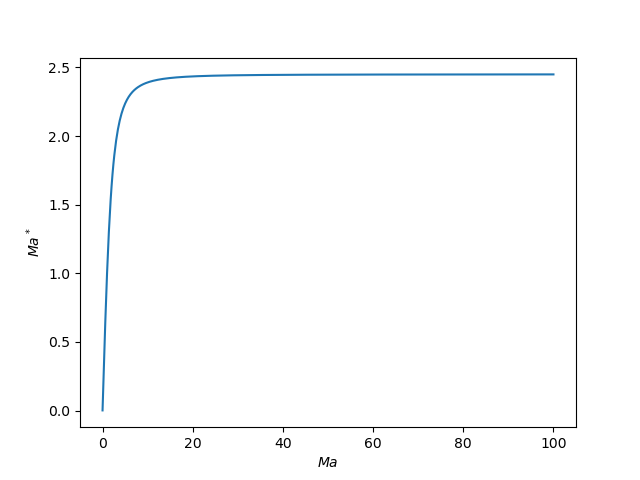

In [21]:
%matplotlib widget
Ma_plot = np.linspace(0.001,100,500)
plt.xlabel(r'$Ma$')
plt.ylabel(r'${Ma}^*$')
plt.plot(Ma_plot,MaStar(Ma_plot));

And, also,
* $\Ma^* = 1$ when  $\Ma = 1$
* $\Ma^* > 1$ when  $\Ma > 1$
* $\Ma^* < 1$ when  $\Ma < 1$

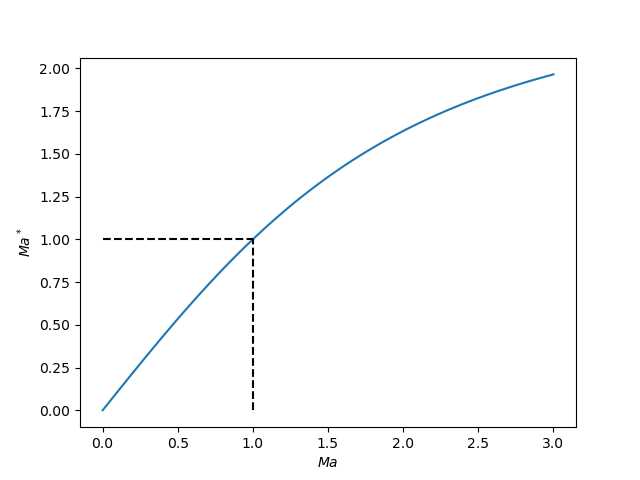

In [22]:
%matplotlib widget
Ma_plot = np.linspace(0.001,3,100)
plt.xlabel(r'$Ma$')
plt.ylabel(r'${Ma}^*$')
plt.plot(Ma_plot,MaStar(Ma_plot));
plt.plot([0,1], [1,1], linestyle='--', color='black');
plt.plot([1,1], [0,1], linestyle='--', color='black');

Ratios between critical and total magnitudes are only function of gamma. For air at standard conditions, they are

In [23]:
Tstar_T0 = 1/T0overT(Ma=1)
pstar_p0 = 1/p0overp(Ma=1)
rhostar_rho0 = 1/rho0overrho(Ma=1)
display(Latex(r'$$\frac{{T^*}}{{T_0}} = {:.5g} $$'.format(Tstar_T0)
                 + r'$$\frac{{p^*}}{{p_0}} = {:.5g} $$'.format(pstar_p0)
                 + r'$$\frac{{\rho^*}}{{\rho_0}} = {:.5g} $$'.format(rhostar_rho0)
                ))

<IPython.core.display.Latex object>

Going back to Equation (10) for continuity, combining with steady Euler equation

$$
u\frac{\text d u}{\text d x} + \frac{1}{\rho}\frac{\text d p}{\text d x} = 0 \tag{20}
$$

and fluid compressibility $\text d p = c^2 \text d \rho$, leads to

$$
\frac{\text d u}{u}=-\frac{\text d p}{\rho u^{2}}=\frac{1}{\Ma^{2}-1}\frac{\text d A}{A} \tag{21}
$$

and that shows that the behavior of the flow in a nozzle depends on the value of $\Ma$

![Image](injector_diffuser.png)


Under critical or sonic conditions, the mass flow remains the same
$$
\rho^{*}u^{*}A^{*}=\rho uA=\dot{m}\,\Rightarrow\frac{A}{A^{*}}=\frac{\rho^{*}u^{*}}{\rho u}, \tag{22}
$$

and this leads to an expression for the relationship between the area of a duct and the critical area as a function of $\Ma$
$$
\boxed{\frac{A}{A^{*}}=\frac{1}{\Ma}\left[\frac{2+(\gamma-1)\Ma^{2}}{\gamma+1}\right]^{\frac{1}{2}\frac{(\gamma+1)}{(\gamma-1)}}} \tag{23}
$$

It is useful to have a function for this operation (and the reverse)

In [24]:
def A_Astar(Ma,gamma=1.4):
    """
    Returns the value of A/A* for a flow with Mach number Ma
    """
    return 1/Ma*((2+(gamma-1)*Ma**2)/(gamma+1))**(0.5*(gamma+1)/(gamma-1))

def MaFromA_Astar(A_Astar_value,gamma=1.4):
    """
    Returns both subsonic and supersonic values of Ma for a value of A/A*
    """
    if A_Astar_value < 1:
        print("The argument A/A* has to be greater than 1")
        return
    elif A_Astar_value == 1:
        return 1.0
    else:
        from scipy.optimize import brentq
        return (brentq(lambda Ma,gamma: A_Astar(Ma,gamma)-A_Astar_value,0.001,1,args=(gamma,)),
                brentq(lambda Ma,gamma: A_Astar(Ma,gamma)-A_Astar_value,1,100,args=(gamma,)))

Let's plot this function

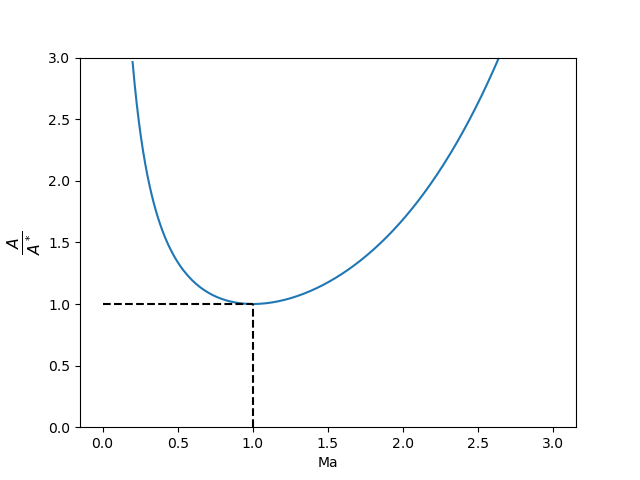

In [25]:
%matplotlib widget
Ma_plot = np.linspace(0.2,3,num=200)
A_Astar_plot=A_Astar(Ma_plot)
plt.plot(Ma_plot,A_Astar_plot);
plt.ylim(0,3);
plt.plot([0,1], [1,1], linestyle='--', color='black');
plt.plot([1,1], [0,1], linestyle='--', color='black');
plt.xlabel('Ma')
plt.ylabel(r'$\frac{A}{A^*}$',fontsize=16);

In [26]:
MaFromA_Astar(2.0)[1]

2.1971981216521863

This shows that, for steady isentropic flow, the critical condition holds for the minimum area section (throat).

## 3. Normal shock waves

<a id="picturesSW"></a>

When flow is supersonic, usually transition to subsonic condition is achieved with a [**shock wave**](https://en.wikipedia.org/wiki/Shock_wave). This can happens in an external supersonic flow, like a detached bow shock wave in front of a bullet

![image.png](bullet.png) [source of image](https://americanart.si.edu/artwork/bullet-shock-wave-32701)

or inside a duct.

If we are talking about shock waves in a duct, or nozzle, this transition to subsonic flow happens in function of the conditions downstream:

![image.png](duct.png) Source of image: Kundu's book

Description of flows in function of dimensionless pressure downstream:
* a: Subsonic flow everywhere
* b: Subsonic flow everywhere except in $A^*$ (throat), where it is sonic
* c: Subsonic until the throat, then supersonic until the (normal) shock wave in the duct. Pressure jumps to adapt to downstream conditions
* d: Subsonic until the throat, then supersonic until the (normal) shock wave in the exit section.
* e: Subsonic until the throat, then supersonic until the shock wave outside of the duct.
* f: Subsonic until the throat, then supersonic. No shock wave. Nozzle design conditions
* g: Subsonic until the throat, then supersonic and expansion waves outside the nozzle (the flows needs still to accelerate to adapt to downstream conditions)


**Flow rate $\dot m$ remains unchanged from *b* on**

Naming $1$ conditions upstream from the shock wave and $2$ downstream (but just in the shock wave position so that surface section $A$ are the same), equations that govern normal shock wave behavior are:

Continuity:
$$
\rho_1 u_1  =  \rho_2 u_2 \tag{24}
$$

Momentum:
$$
p_1 + \rho_1 u_1^2  =  p_2 + \rho_2 u_2^2 \tag{25}
$$

Energy:
$$
h_1 + \frac{1}{2}u_1^2  = h_2 + \frac{1}{2} u_2^2 \tag{26}
$$

Note that, unlike energy, entropy is not conserved.

Also, ideal gas relationships hold:

$$
\frac{p}{\rho}  =  r T \\
h  =  c_p T 
$$

On the other hand, since flow is adiabatic, ${T_0}_1 = {T_0}_2 = T_0$ (and, consequently, $T^*_1 = T^*_2 = T^*$). That does not hold for pressure or density, ${p_0}_1 \neq {p_0}_2$

Operating these equations (see section 8.6 of [Anderson's book](https://www.mheducation.com/highered/product/fundamentals-aerodynamics-anderson/M9781259129919.html) ([UPC library link](https://discovery.upc.edu/permalink/34CSUC_UPC/19srfpi/cdi_proquest_ebookcentral_EBC5662650)) we can get the *Prandtl relation*

$$
u_1 u_2 = {c^*}^2 \tag{27} 
$$

that can be expressed in dimensionless way as

$$
\Ma^*_1 \Ma^*_2 = 1 \tag{28}
$$

that implies that if in 1 flow is supersonic and $\Ma^*_1 > 1$, in 2 it *must* be subsonic, $\Ma^*_2 < 1$

By substitution of (19) we get the important relationship between Mach numbers before and after the normal shock wave:

$$
\Ma_2^2 = \frac{1+\frac{\gamma -1}{2}\Ma_1^2}{\gamma \Ma_1^2-\frac{\gamma-1}{2}} \tag{29}
$$

and the reverse, which is exactly the same (obvious from dimensionless form of Prandtl equation (13)). An unique function serves to compute $\Ma_2$ from $\Ma_1$ or the reverse. Note that neither value $\Ma_1$ and $\Ma_2$ can be lower than $\sqrt{\frac{\gamma - 1}{2\gamma}} ( \approx 0.378 \; \text{for air})$. Nevertheless, keep in mind that it only has physical sense for $\Ma_1 > 1$

In [27]:
def MaShockwave(Ma,gamma=1.4):
    """
    Return the Mach number after a normal shock wave as funtion of Ma before the shock wave.
    """
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        Ma2 = Ma**2
        beta = (gamma-1)/2
        Ma22 = (1+beta*Ma2)/(gamma*Ma2-beta)
        return np.sqrt(Ma22)

In [28]:
Ma1 = 1e6
display(Latex('$\mathrm{{Ma}}_1 = {:.4g} \; \\rightarrow \; \mathrm{{Ma}}_2 = {:.4g}$'.format(Ma1,MaShockwave(Ma1))))

<IPython.core.display.Latex object>

We can plot this relationship.

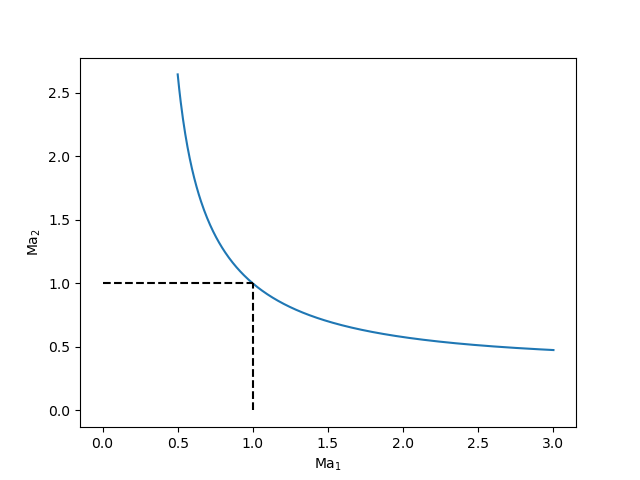

In [29]:
# We do not call MaShockWave to plot the function because we want to avoid the Ma_1 < 1 restriction
%matplotlib widget
Ma_plot = np.linspace(0.5,3,500)
Ma_plot2 = Ma_plot**2
gamma = 1.4
beta = (gamma-1)/2
Ma_plot22 = (1+beta*Ma_plot2)/(gamma*Ma_plot2-beta)
plt.xlabel(r'$\mathrm{Ma}_1$')
plt.ylabel(r'$\mathrm{Ma}_2$')
plt.plot(Ma_plot,np.sqrt(Ma_plot22))
plt.plot([0,1], [1,1], linestyle='--', color='black');
plt.plot([1,1], [0,1], linestyle='--', color='black');

$\Ma_1$ (and consequently $\Ma^*_1$) is an important parameter in normal shock wave. Its value determines, for example, the ratio between densities and velocities

$$
\frac{\rho_2}{\rho_1}=\frac{u_1}{u_2} = {\Ma^*_1}^2 = \frac{(\gamma + 1){\Ma_1}^2}{2 + (\gamma - 1){\Ma_1}^2 } \tag{30}
$$

The ratio between pressures can be derived from momentum balance, giving

$$
\frac{p_2}{p_1}= 1 + \frac{2 \gamma}{\gamma+1}\left(\Ma_1^2 - 1 \right) \tag{31}
$$

And the temperatures ratios from the two previous relationships with perfect gas equation,

$$
\frac{T_2}{T_1} = \left[1 + \frac{2 \gamma}{\gamma+1}\left(\Ma_1^2 - 1 \right)\right]
                \left[\frac{2 + (\gamma - 1){\Ma_1}^2 }{(\gamma + 1){\Ma_1}^2}\right] \tag{32}
$$

We define all this expressions in python functions

In [30]:
def rho2_rho1(Ma,gamma=1.4):
    """Returns rho_2/rho_1 for a shock wave with Mach number Ma > 1"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        return MaStar(Ma,gamma=gamma)**2
    
def u2_u1(Ma,gamma=1.4):
    """Returns u_2/u_1 for a shock wave with Mach number Ma > 1"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        return 1/MaStar(Ma,gamma=gamma)**2

def p2_p1(Ma,gamma=1.4):
    """Returns p_2/p_1 for a shock wave with Mach number Ma > 1"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        return 1 + 2*gamma/(gamma+1)*(Ma**2-1)
    
def T2_T1(Ma,gamma=1.4):
    """Returns T_2/T_1 for a shock wave with Mach number Ma > 1"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        return p2_p1(Ma,gamma)/rho2_rho1(Ma,gamma)

In [33]:
Ma1 = 6
display(Latex(r'$\mathrm{{Ma}}_1 = {:.4g}$:'.format(Ma1) 
                 + r'$$\frac{{\rho_2}}{{\rho_1}} = {:.4g}$$'.format(rho2_rho1(Ma1))
                 + r'$$\frac{{u_2}}{{u_1}} = {:.4g}$$'.format(u2_u1(Ma1))
                 + r'$$\frac{{p_2}}{{p_1}} = {:.4g}$$'.format(p2_p1(Ma1))
                 + r'$$\frac{{T_2}}{{T_1}} = {:.4g}$$'.format(T2_T1(Ma1))
                ))
                 
                 

<IPython.core.display.Latex object>

The increment of entropy is computed from second law of thermodynamics

$$
s_2 - s_1 = c_p \ln{\frac{T2}{T1}} - r \ln{\frac{p_2}{p_1}} \tag{33}
$$

and, in dimensionless way

$$
\frac{s_2 - s_1}{r} = \frac{\gamma -1}{\gamma} \ln{\frac{T2}{T1}} - \ln{\frac{p_2}{p_1}} \tag{34}
$$

And this entropy increment can also be computed in a function

In [34]:
def DeltaS_r(Ma,gamma=1.4):
    """Returns (s_2-s_1)/r for a shock wave"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        return gamma/(gamma-1)*np.log(T2_T1(Ma,gamma))-np.log(p2_p1(Ma,gamma))

Considering that, by definition, $p_0$ and $T_0$ are isentropic process from the state $p,T$, that means that for temperatures ${T_0}_1$ and ${T_0}_2$ and for pressures ${p_0}_1$ ad ${p_0}_2$ the increment of entropy would be the same. On the other side, for a shock wave, ${T_0}_1 = {T_0}_2 = T_0$ and, hence, difference of total pressure across a shock wave is given by

$$
\frac{s_2 - s_1}{r} =  - \ln{\frac{{p_0}_2}{{p_0}_1} \; \Rightarrow \;\frac{{p_0}_2}{{p_0}_1}} = e^{-\frac{s_2 - s_1}{r}} \tag{35}
$$

In [35]:
def p02_p01(Ma,gamma=1.4):
    """Returns p02/p01 for a shock wave"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        return np.exp(-DeltaS_r(Ma,gamma))

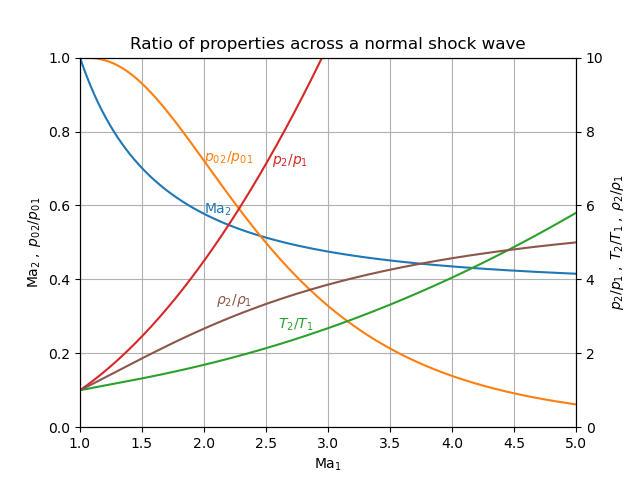

In [36]:
%matplotlib widget
Ma_plot=np.linspace(1,5,500)
fig,ax1 = plt.subplots()

ax1.set_title('Ratio of properties across a normal shock wave')
ax1.set_xlabel(r'$\mathrm{Ma}_1$')
ax1.set_ylabel (r'$\mathrm{Ma}_2\;,\;{p_0}_2/{p_0}_1$')
ax1.plot(Ma_plot,MaShockwave(Ma_plot))
ax1.plot(Ma_plot,p02_p01(Ma_plot))
ax2 = ax1.twinx()
ax2.set_ylabel (r'$p_2/p_1\; , \;T_2/T_1\; , \;\rho_2/\rho_1$')
ax2.plot(Ma_plot,p2_p1(Ma_plot),color='tab:red')
ax2.plot(Ma_plot,T2_T1(Ma_plot),color='tab:green')
ax2.plot(Ma_plot,rho2_rho1(Ma_plot),color='tab:brown')
ax2.set_ylim(0.0,10.0)
ax1.set_ylim(0.0,1.0)
ax1.set_xlim(1.0,np.max(Ma_plot))
ax1.annotate(r'$\mathrm{Ma}_2$',(2.0,MaShockwave(2.0)),color='tab:blue')
ax1.annotate(r'${p_0}_2/{p_0}_1$',(2.0,p02_p01(2.0)),color='tab:orange')
ax2.annotate(r'$p_2/p_1$',(2.55,p2_p1(2.5)),color='tab:red')
ax2.annotate(r'$T_2/T_1$',(2.6,T2_T1(3.0)),color='tab:green')
ax2.annotate(r'$\rho_2/\rho_1$',(2.1,rho2_rho1(2.5)),color='tab:brown')
ax1.grid()

### Exercise

Use the above functions to compute the mass flow rate in a nozzle knowing the area of the nozzle, the Mach number, the pressure and the temperature. It can be named, for instance `MassFlowRate(Ma,A,T,p,gamma=1.4,M=0.0289647)`.

## 4. Oblique shock wave and expansion waves

Normal shock waves are a particular case of the more general [oblique shock waves](https://en.wikipedia.org/wiki/Oblique_shock). In a oblique shock, supersonic flow is deviated by an obstacle. We are going to consider, for the shake of simplicity that the obstacle is a corner of angle $\theta$, and the flow is everywhere uniform and parallel to ground

![image.png](OSW.png)

In contrast, in an [expansion wave](https://en.wikipedia.org/wiki/Prandtl%E2%80%93Meyer_expansion_fan), the flow is accelerated by a convex corner.

For the study of an oblique shock velocity is decomposed in normal and tangential velocity to sock wave. In this pictures, taken from Anderson's book, velocity is named as $V$ and normal and tangential as $u$ and $w$. Where are going to use notation $u, u_n$ and $u_t$

![Image](OSW2.png)

The main results, that we are not going to prove are:

* Tangential velocity is conserved across the oblique shock wave (that also holds for normal shock wave where both components are null)

$$
{u_t}_1 = {u_t}_2 \tag{36}
$$

* Balance equations are

    * Continuity:
$$
\rho_1 {u_n}_1  =  \rho_2 {u_n}_2 \tag{37}
$$

    * Momentum:
$$
p_1 + \rho_1 {u_n}_1^2  =  p_2 + \rho_2 {u_n}_2^2 \tag{38}
$$

    * Energy:
$$
h_1 + \frac{1}{2}{u_n}_1^2  =  h_2 + \frac{1}{2} {u_n}_2^2 \tag{39}
$$


i.e., exactly the same expressions for normal shock wave applied to only the normal velocity. That means that we van use the above functions to make the computations for oblique shocks just keeping in mind that we are computing only normal component. That also implies that results are referred uniquely to normal Mach number

$$
\Ma_n = \Ma\sin{\beta} \tag{40}
$$

From the picture above, is easily shown that 

$$
\Ma_2 = \frac{{\Ma_n}_2}{\sin{(\beta-\theta)}} \tag{41}
$$

which will be useful when we will get ${\Ma_n}_2$ from the functions of normal shock. 

To the functions for normal shock wave, we have now to include a new parameter, $\beta$. 
Actually, note that normal shock wave is the particular case of oblique shock form $\beta = \pi/2$. The deflection angle $\theta$ is a unique function of $\Ma_1$ and $\beta$:

$$
\frac{\tan{(\beta - \theta)}}{\tan{\beta}} = \frac{u_{n2}}{u_{n1}} = \frac{2+(\gamma-1)\Ma_1^2\sin^2\beta}{(\gamma+1)\Ma_1^2\sin^2\beta} \tag{42}
$$

that leads to

$$
\tan \theta = \frac{2}{\tan\beta}\left[\frac{\Ma_1^2\sin^2\beta - 1}{\Ma_1^2(\gamma+\cos2\beta)+2}\right] \tag{43} 
$$

known as the $\theta-\beta-\Ma$ relation. Let's write it as a python function

In [37]:
def ThetaOSW(Ma,beta,gamma=1.4):
    """
    Returns the deflection angle theta for an oblique shock wave, given the incident Ma number and the angle os the SW, beta. 
    """
    tanTheta = 2/np.tan(beta)*(Ma**2*np.sin(beta)**2-1)/(Ma**2*(gamma+np.cos(2*beta))+2)
    return np.arctan(tanTheta)

This functions has a maximum value for a given value of $\Ma_1$. Let's make a function that determines this maximum value given the incident Mach number

In [38]:
def MaxThetaOSW(Ma,gamma=1.4):
    from scipy.optimize import brent
    def f(beta):
        return -ThetaOSW(Ma,beta,gamma)
    interval = (np.deg2rad(50),np.deg2rad(80))
    betaMax = brent(f,brack=interval)
    return np.rad2deg(betaMax),np.rad2deg(ThetaOSW(Ma,betaMax,gamma))

In [39]:
MaxThetaOSW(2)

(64.66897983522868, 22.97353176093794)

and we make a plot for the deflection angle as a function of the inlet Mach number and the shock wave angle.

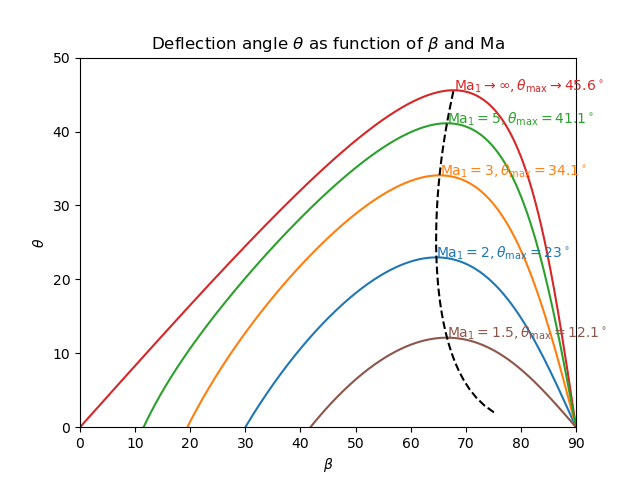

In [40]:
%matplotlib widget
fig,ax = plt.subplots()
beta_plot_deg = np.linspace(0.001,90,500)
beta_plot = np.deg2rad(beta_plot_deg)
ax.set_title(r'Deflection angle $\theta$ as function of $\beta$ and $\mathrm{Ma}$')
ax.set_ylim(0,50)
ax.set_xlim(0,90)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\theta$')
ax.plot(beta_plot_deg,np.rad2deg(ThetaOSW(Ma=1000,beta=beta_plot)),color='tab:red')
ax.annotate(r'$\mathrm{{Ma}}_1 \rightarrow \infty, \theta_\mathrm{{max}} \rightarrow {:.3g}^\circ$'.format(MaxThetaOSW(1000)[1]),MaxThetaOSW(1000),color='tab:red')
ax.plot(beta_plot_deg,np.rad2deg(ThetaOSW(Ma=2,beta=beta_plot)),color='tab:blue')
ax.annotate(r'$\mathrm{{Ma}}_1 = 2, \theta_\mathrm{{max}} = {:.3g}^\circ$'.format(MaxThetaOSW(2)[1]),MaxThetaOSW(2),color='tab:blue')
ax.plot(beta_plot_deg,np.rad2deg(ThetaOSW(Ma=3,beta=beta_plot)),color='tab:orange')
ax.annotate(r'$\mathrm{{Ma}}_1 = 3, \theta_\mathrm{{max}} = {:.3g}^\circ$'.format(MaxThetaOSW(3)[1]),MaxThetaOSW(3),color='tab:orange')
ax.plot(beta_plot_deg,np.rad2deg(ThetaOSW(Ma=5,beta=beta_plot)),color='tab:green')
ax.annotate(r'$\mathrm{{Ma}}_1 = 5, \theta_\mathrm{{max}} = {:.3g}^\circ$'.format(MaxThetaOSW(5)[1]),MaxThetaOSW(5),color='tab:green')
ax.plot(beta_plot_deg,np.rad2deg(ThetaOSW(Ma=1.5,beta=beta_plot)),color='tab:brown')
ax.annotate(r'$\mathrm{{Ma}}_1 = 1.5, \theta_\mathrm{{max}} = {:.3g}^\circ$'.format(MaxThetaOSW(1.5)[1]),MaxThetaOSW(1.5),color='tab:brown')
Ma_plot=np.logspace(0.05,3,200)
MaxBeta_plot = np.zeros(200)
MaxTheta_plot = np.zeros(200)
for i in range(Ma_plot.size):
    MaxBeta_plot[i],MaxTheta_plot[i] = MaxThetaOSW(Ma_plot[i])
ax.plot(MaxBeta_plot,MaxTheta_plot,'k--')

Note that for given values of $\Ma_1$ and $\theta < \theta_\mathrm{max}$ there are two possible values of $\beta$. The smaller value is related to a **weak shock wave** whereas the larger value is for a **strong shock wave**

### Exercise

Write a function `betaOSW(Ma,theta,gamma=1.4)` that returns these two values.

Usually, for typical situations, the weak OSW is the one obtained in the flow, but it will depend mainly on the back pressure. For the strong OSW flow downstream is subsonic. For the weak OSW, it is usually supersonic, except for some conditions.

If, for a given $\Ma_1$ the deflection angle is $\theta > \theta_\mathrm{max}$, there is no solution for an OSW, the shock wave then detaches and it becomes a normal, or bow, shock wave, like the one in the [first picture of this notebook](#picturesSW).

The value of $\beta$ obtained for $\theta=0$ is related to the OSW when the obstacle is very sharp, or just a point. This is called the *Mach angle* and the OSW is a *Mach wave*. This angle is the same as in the [Mach cone](#Mach-cone). 

$$
\beta_\mathrm{min} = \mu = \arcsin{\frac{1}{\Ma_1}} \tag{44}
$$

***

**Exercise:**

Use the function of previous exercise to compute the shock wave angle angle of a uniform supersonic stream with $\Ma_1 = 3.0$, $p_1 = 1\,\mathrm{atm}$ and 
$T_1 = 288\,\mathrm{K}$ when it encounters a compression angle with a deflection angle $\theta = 20^\circ$. Compute also all the flow characteristics behind the shock wave.

Analyze the results when $\theta$ is raised (to $30^\circ$ for instance) keeping $\Ma_1$, and when $\Ma_1$ is increased (to 5, for instance) keeping the angle $\theta$.

***


### Shock Polar

In a shock polar (see, for example, the section 6.7.3 in the [book by Houghton](https://discovery.upc.edu/iii/encore/record/C__Rb1437643?lang=cat) ) the components of dimensionless velocity behind the OSW are plotted in an [hodograph](https://en.wikipedia.org/wiki/Hodograph). The polar angle of the points of the plot for a given $\Ma_1$ is the deflection angle. Nevertheless, to represent dimensionless velocity in the plot (not the label for the plot) is more convenient to use $\Ma_2^*$, since it has a finite value  (see Eq (10)) even for $\Ma_1 \rightarrow \infty$.

We can plot the shock polar computing velocity components for all the angles $\theta$ in the range of previous plot, or, also, it can be used the expression (that we are not going to prove) 

$$
{{\Ma_2^*}_y}^2 = \frac{\left(\Ma_1^* - {\Ma_2^*}_x \right)^2\left( {\Ma_2^*}_x \Ma_1^* - 1\right)}
{\frac{2}{\gamma+1}{\Ma_1^*}^2- \left({\Ma_2^*}_x \Ma_1^* - 1\right)} \tag{45}
$$

## 5. Prandtl-Meyer expansion fan

In the [Prandtl-Meyer expansion fan](https://en.wikipedia.org/wiki/Prandtl%E2%80%93Meyer_expansion_fan) the behavior of the flow is just the opposite of with OSW. In this case, Mach number increases, and all temperature, pressure and density decrease. This expansion can be considered isentropic, and it can be interpreted as composed of infinite number of Mach waves, bounded by the angles $\mu_1 = \arcsin\left({\frac{1}{\Ma_1}}\right)$ and $\mu_2 = \arcsin\left({\frac{1}{\Ma_2}}\right)$

![Image](PrandtlMeyer.png)

The derivation, from purely geometrical basis, with an infinitesimal deviation produced by a Mach wave, leads to 

$$
\frac{u+\mathrm{d}u}{u} = 1 + \frac{\mathrm{d}u}{u} = \frac{\cos \mu}{\cos \mu \cos \mathrm{d}\theta - \sin \mu \sin \mathrm{d}\theta} 
\approx \frac{1}{1-\tan \mu \mathrm{d}\theta} \approx 1 + \tan \mu \mathrm{d} \theta = 1 + \frac{\mathrm{d} \theta}{\sqrt{\Ma^2-1}} \tag{46}
$$

and, from here,  

$$
\mathrm{d} \theta = \sqrt{\Ma^2-1} \frac{\mathrm{d}u}{u} = \frac{\sqrt{\Ma^2-1}}{1+\frac{\gamma-1}{2}\Ma^2}\frac{\mathrm{d}\Ma}{\Ma} \tag{47}
$$

and

$$
\theta_2 - \theta_1 = \int_{\Ma_1}^{\Ma_2}\frac{\sqrt{\Ma^2-1}}{\Ma\left(1+\frac{\gamma-1}{2}\Ma^2\right)} \mathrm{d}\Ma = 
\nu\left(\Ma_2\right) - \nu\left(\Ma_1\right) \tag{48}
$$

where 

$$
\nu\left(\Ma\right) = \int \frac{\sqrt{\Ma^2-1}}{\Ma\left(1+\frac{\gamma-1}{2}\Ma^2\right)} \mathrm{d}\Ma = 
\sqrt{\frac{\gamma+1}{\gamma-1}}\arctan \sqrt{\frac{\gamma-1}{\gamma+1}\left(\Ma^2-1\right)} - \arctan \sqrt{\Ma^2-1} \tag{49}
$$

is the [Prandtl-Meyer function](https://en.wikipedia.org/wiki/Prandtl%E2%80%93Meyer_function)

In [41]:
def PrandtlMeyer(Ma,gamma=1.4):
    """Returns the Prandtl-Meyer function for a given Mach number, greater than 1, in radians"""
    if np.any(Ma) < 1:
        print('Ma has to be greater or equal to 1')
        return
    else:
        auxGamma = np.sqrt((gamma+1)/(gamma-1))
        auxMa = np.sqrt(Ma**2-1)
        return auxGamma*np.arctan(auxMa/auxGamma)-np.arctan(auxMa)

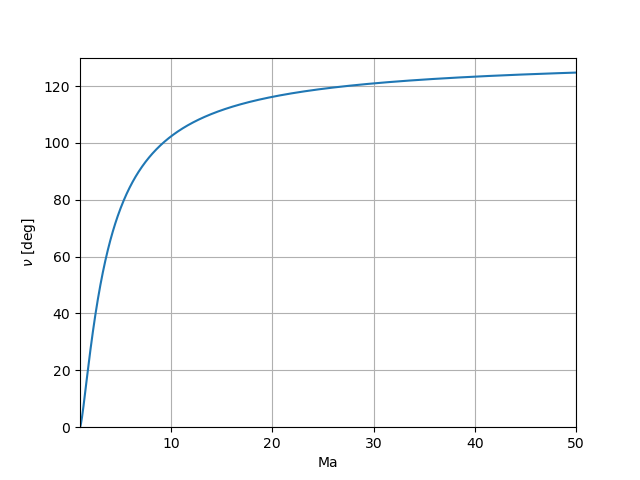

In [42]:
%matplotlib widget
Ma_plot = np.linspace(1.001,50,1000)
nu_plot = np.rad2deg(PrandtlMeyer(Ma_plot))
plt.xlim(1,50)
plt.ylim(0,130)
plt.xlabel(r'$\mathrm{Ma}$')
plt.ylabel(r'$\nu$ [deg]')
plt.grid()
plt.plot(Ma_plot,nu_plot);